# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
import os
print(os.getcwd())
tk = th.Thicket.from_caliperreader(glob("/home/stevenm27/435Project/caliper/cuda/naive/*.cali", recursive=True))

# tk = th.Thicket.from_caliperreader(glob("/home/kdai/project/cpu/mpi_naive/*.cali"))

/scratch/user/stevenm27


In [3]:
# Performance data
tk.dataframe

nid  \
node                                            profile           
{'name': 'main', 'type': 'function'}            143968115     1   
                                                154850129     1   
                                                203523622     1   
                                                642183418     1   
                                                781239902     1   
                                                845783814     1   
                                                958855224     1   
                                                1037798917    1   
                                                1111246066    1   
                                                1134125421    1   
                                                1280951754    1   
                                                1445193331    1   
                                                1457038927    1   
                                                1494943624    1   
                                                1568310414    1   
                                                1831190755    1   
                                                2023138300    1   
                                                2043541470    1   
                                                2111130329    1   
                                                2169886685    1   
                                                2340037615    1   
                                                2502413442    1   
                                                2521234927    1   
                                                2656765753    1   
                                                2785951277    1   
                                                2867737035    1   
                                                2908839489    1   
                                                3023578912    1   
                                                3118200256    1   
                                                3245137670    1   
                                                3257684825    1   
                                                3483870033    1   
                                                3687446439    1   
                                                4118749516    1   
                                                4124062402    1   
                                                4127689813    1   
{'name': 'comm', 'type': 'function'}            143968115     3   
                                                154850129     3   
                                                203523622     3   
                                                642183418     3   
                                                781239902     3   
                                                845783814     3   
                                                958855224     3   
                                                1037798917    3   
                                                1111246066    3   
                                                1134125421    3   
                                                1280951754    3   
                                                1445193331    3   
                                                1457038927    3   
                                                1494943624    3   
                                                1568310414    3   
                                                1831190755    3   
                                                2023138300    3   
                                                2043541470    3   
                                                2111130329    3   
                                                2169886685    3   
                                                2340037615    3   
                                                2502413442    3   
                                        

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,
143968115,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t8-v512.cali,1699843062,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 8, 512]",g,CUDA Naive Matrix Multiplication,CUDA,int,4,512,8,64,8,Online
154850129,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t16-v512.cali,1699843082,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 16, 512]",g,CUDA Naive Matrix Multiplication,CUDA,int,4,512,16,32,8,Online
203523622,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t4-v2048.cali,1699843062,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 4, 2048]",g,CUDA Naive Matrix Multiplication,CUDA,int,4,2048,4,512,8,Online
642183418,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t2-v1024.cali,1699843041,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 2, 1024]",g,CUDA Naive Matrix Multiplication,CUDA,int,4,1024,2,512,8,Online
781239902,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t8-v256.cali,1699843062,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 8, 256]",g,CUDA Naive Matrix Multiplication,CUDA,int,4,256,8,32,8,Online
845783814,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1-v2048.cali,1699843014,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 1, 2048]",g,CUDA Naive Matrix Multiplication,CUDA,int,4,2048,1,2048,8,Online
958855224,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t2-v128.cali,1699843023,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 2, 128]",g,CUDA Naive Matrix Multiplication,CUDA,int,4,128,2,64,8,Online
1037798917,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t8-v128.cali,1699843062,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 8, 128]",g,CUDA Naive Matrix Multiplication,CUDA,int,4,128,8,16,8,Online
1111246066,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t16-v256.cali,1699843082,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cuda, 16, 256]",g,CUDA Naive Matrix Multiplication,CUDA,int,4,256,16,16,8,Online


In [5]:
gb = tk.groupby("num_threads")

6  thickets created...
{1: <thicket.thicket.Thicket object at 0x2b73ffb1dd30>, 2: <thicket.thicket.Thicket object at 0x2b73ff9b5d00>, 4: <thicket.thicket.Thicket object at 0x2b73ffa57400>, 8: <thicket.thicket.Thicket object at 0x2b73ffaafac0>, 16: <thicket.thicket.Thicket object at 0x2b73ff9a7ee0>, 32: <thicket.thicket.Thicket object at 0x2b73ffa86ee0>}


Compose these 3 groups column-wise to get a holistic view of the data

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

Perform pandas operations to get the table in a desirable format for plotting

In [6]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)

# Drop unwanted columns
array = [("node","")]
for i in (1,2,4,8,16,32):
    array.append((i,"nid"))
    array.append((i,"spot.channel"))
    
    #comment out the one you want to plot
    array.append((i, 'Min time/rank'))
    array.append((i, 'Max time/rank'))
#     array.append((i, 'Avg time/rank'))
    array.append((i, 'Total time'))
    array.append((i, 'Avg GPU time/rank'))
    array.append((i, 'Min GPU time/rank'))
    array.append((i, 'Max GPU time/rank'))
    array.append((i, 'Max GPU time/rank'))
    array.append((i, 'Total GPU time'))

ctk.dataframe = ctk.dataframe.reset_index().drop(array, axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [7]:
ctk.dataframe.columns

MultiIndex([( 1, 'Avg time/rank'),
            ( 2, 'Avg time/rank'),
            ( 4, 'Avg time/rank'),
            ( 8, 'Avg time/rank'),
            (16, 'Avg time/rank'),
            (32, 'Avg time/rank')],
           )

In [8]:
ctk.dataframe

1             2             4  \
                          Avg time/rank Avg time/rank Avg time/rank   
name            InputSize                                             
main            128            0.542437      0.349152      0.350405   
                256            0.402259      0.413590      0.398038   
                512            1.109510      1.158627      0.803614   
                1024           7.837576      7.080239      6.981302   
                2048          68.222752     55.564658     68.112672   
                4096         903.904171   1455.863900   1578.350274   
comm            128            0.000215      0.000213      0.000237   
                256            0.000349      0.000367      0.000349   
                512            0.001060      0.000996      0.000889   
                1024           0.002991      0.002813      0.002720   
                2048           0.011048      0.010874      0.011196   
                4096           0.059830      0.045517      0.043702   
cudamemcpy      128            0.000170      0.000168      0.000185   
                256            0.000304      0.000311      0.000294   
                512            0.000985      0.000932      0.000838   
                1024           0.002906      0.002744      0.002649   
                2048           0.010944      0.010794      0.011090   
                4096           0.059713      0.045426      0.043595   
comp            128            0.000445      0.000276      0.000211   
                256            0.003029      0.000933      0.000389   
                512            0.023544      0.008475      0.002115   
                1024           0.193242      0.074308      0.015330   
                2048           1.303849      0.349826      0.114999   
                4096          12.003080      2.961629      0.705372   
cuda_naive_time 128            0.000430      0.000261      0.000194   
                256            0.003015      0.000915      0.000372   
                512            0.023520      0.008459      0.002098   
                1024           0.193204      0.074286      0.015310   
                2048           1.303796      0.349802      0.114964   
                4096          12.003025      2.961575      0.705309   
correctness     128            0.006987      0.006979      0.007465   
                256            0.055394      0.055599      0.055982   
                512            0.719716      0.791351      0.463365   
                1024           7.228627      6.624202      6.575819   
                2048          66.372011     54.687752     67.435789   
                4096         890.688351   1451.779420   1576.466591   
data_init       128            0.000805      0.000818      0.000868   
                256            0.003141      0.003128      0.003283   
                512            0.013706      0.012473      0.011741   
                1024           0.047049      0.047058      0.046308   
                2048           0.187425      0.184632      0.193102   
                4096           0.780574      0.734775      0.769680   

                                      8            16            32  
                          Avg time/rank Avg time/rank Avg time/rank  
name            InputSize                                            
main            128            0.341902      0.343892      0.349749  
                256            0.393416      0.393226      0.408139  
                512            0.911755      0.915955      1.111208  
                1024           6.653684      6.660994      6.953529  
                2048          53.824074     53.583578     55.883911  
                4096        1456.436239   1570.468101   1365.843221  
comm            128            0.000207      0.000206      0.000202  
                256            0.000337      0.000346      0.000317  
                512            0.000940      0.000934      0.000953  
  

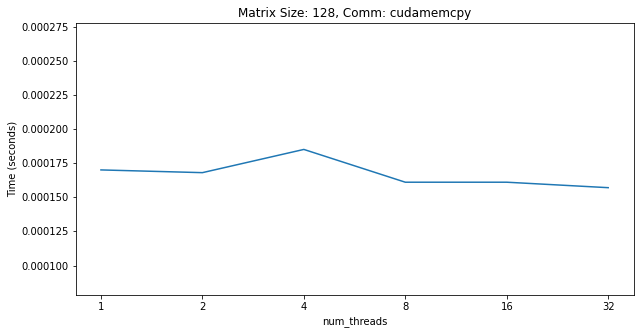

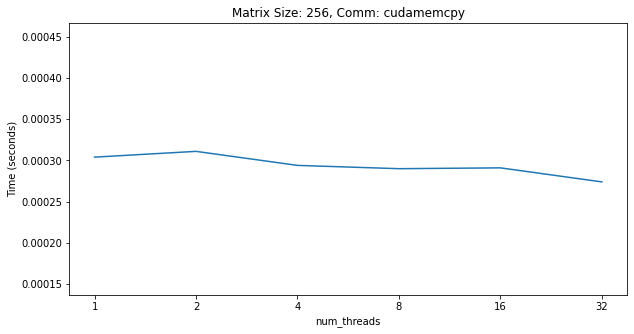

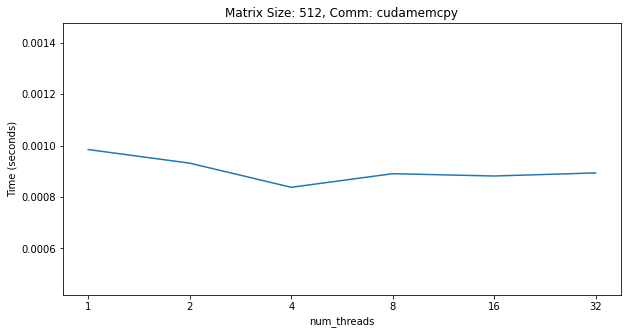

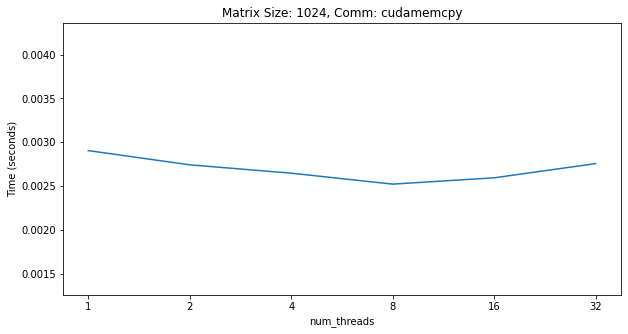

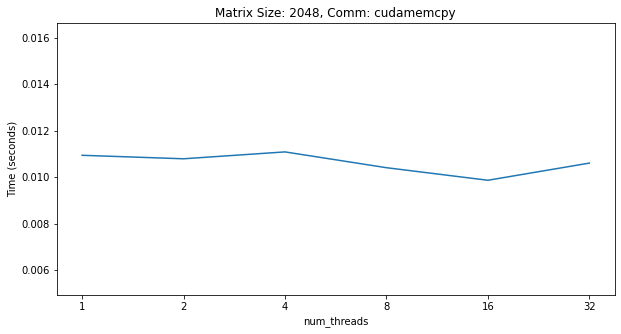

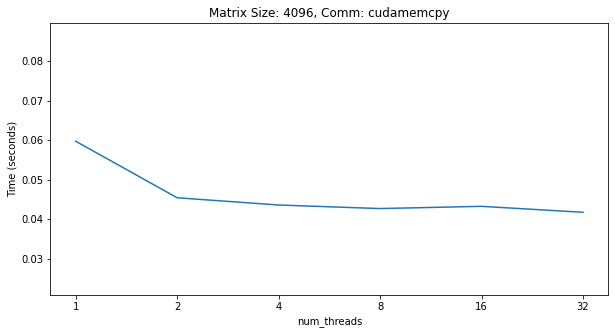

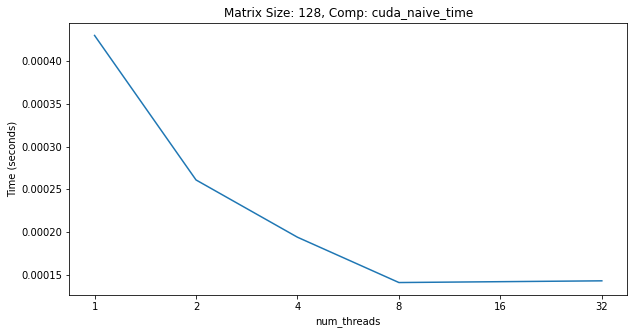

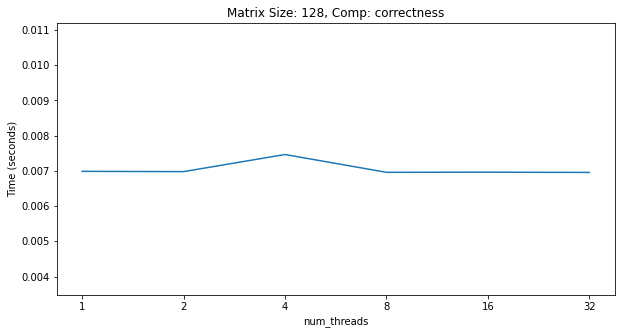

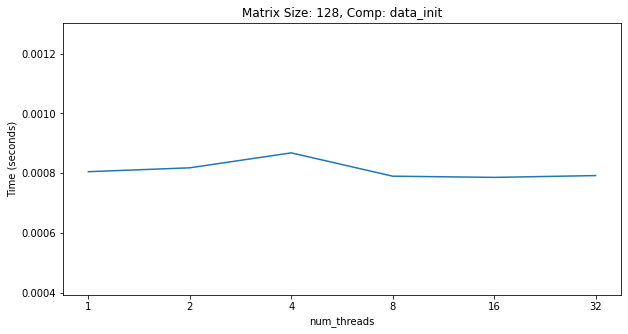

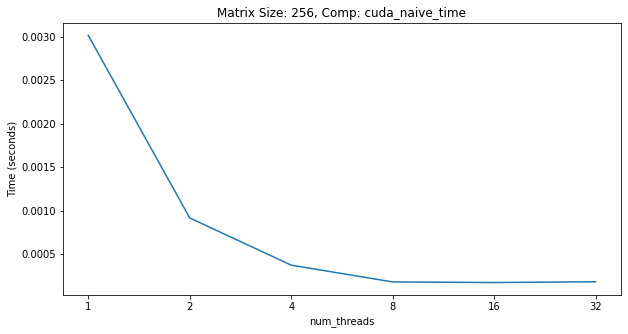

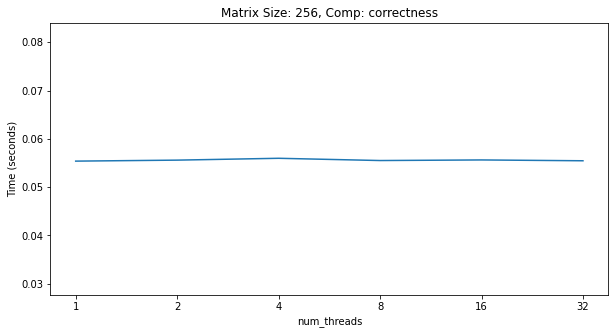

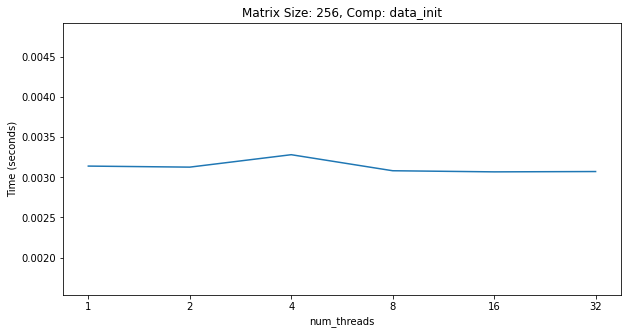

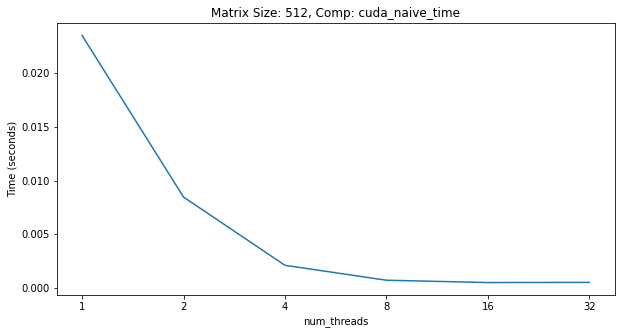

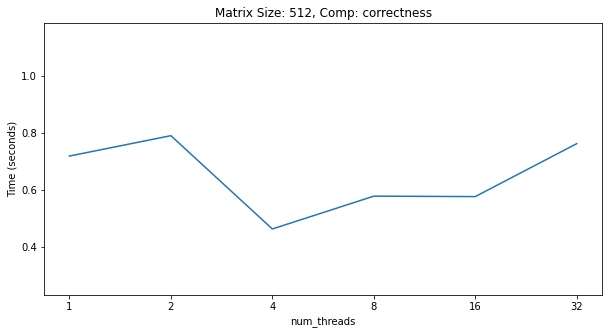

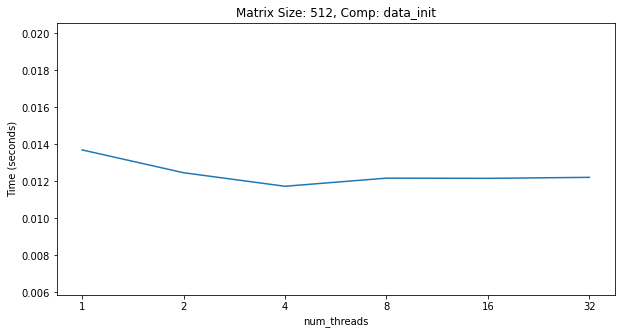

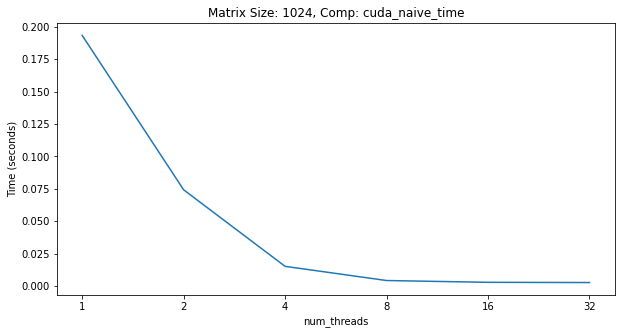

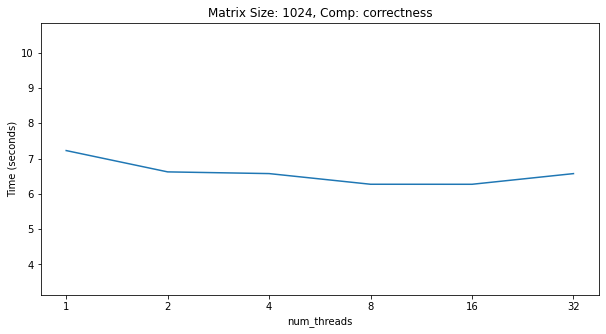

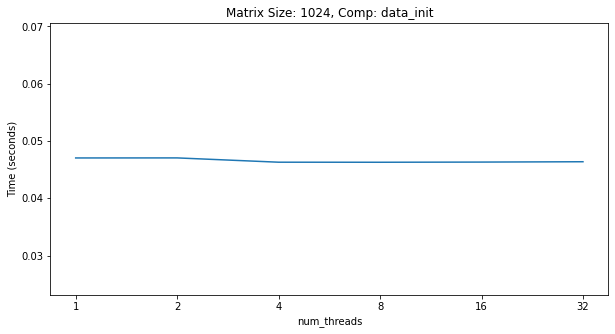

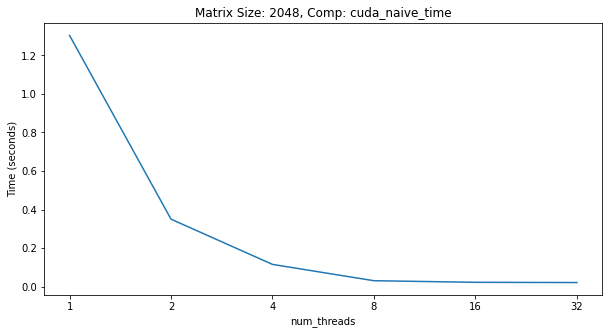

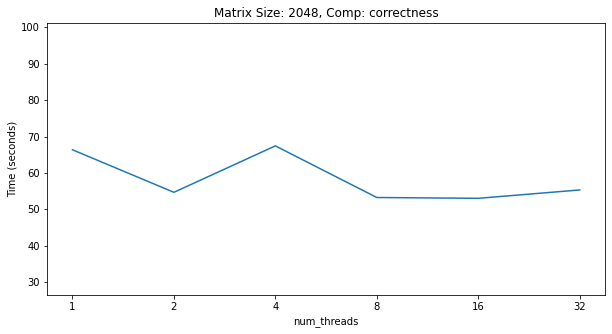

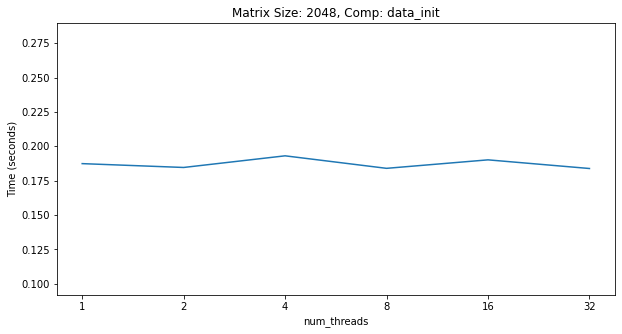

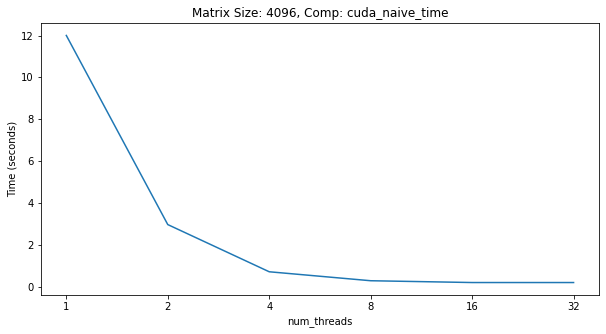

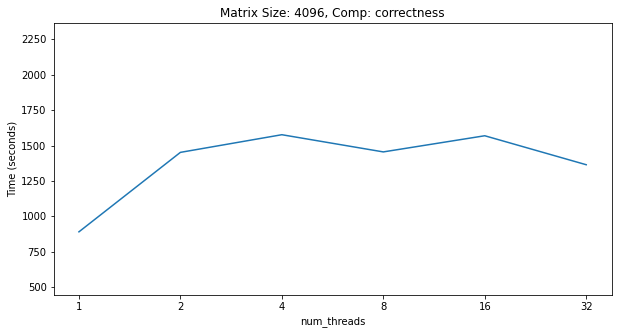

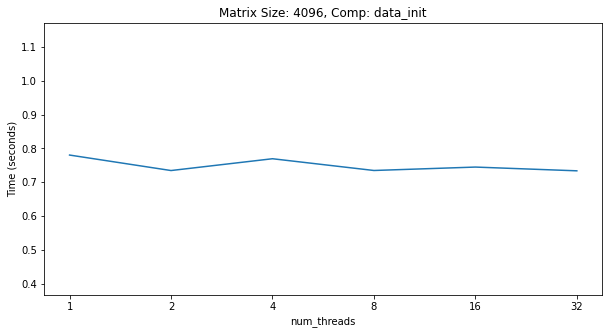

In [12]:
# import matplotlib.pyplot as plt

# # Define your data series and matrix sizes
# matrix_sizes = [128, 256, 512, 1024, 2048, 4096]
# comm = ["cudamemcpy"]
# comp = ["cuda_naive_time", "correctness", "data_init"]

# # Plot 'comm' data series
# plt.figure(figsize=(10, 5))
# for matrix_size in matrix_sizes:
#     for data_series in comm:
#         data = df.loc[(data_series, matrix_size), :]
#         data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
#         data.plot(label=f'Matrix Size: {matrix_size}')
# plt.title("Comm Data Series")
# plt.xlabel("num_threads")
# plt.ylabel("Time (seconds)")
# plt.yscale("log")
# plt.legend()
# plt.show()

# # Plot 'comp' data series
# plt.figure(figsize=(10, 5))
# for matrix_size in matrix_sizes:
#     for data_series in comp:
#         data = df.loc[(data_series, matrix_size), :]
#         data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
#         data.plot(label=f'Matrix Size: {matrix_size}')
# plt.title("Comp Data Series")
# plt.xlabel("num_threads")
# plt.ylabel("Time (seconds)")
# plt.legend()
# plt.show()
#-----------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Define your data series and matrix sizes
matrix_sizes = [128, 256, 512, 1024, 2048, 4096]
comm = ["cudamemcpy"]
comp = ["cuda_naive_time", "correctness", "data_init"]

# Plot each 'comm' data series in its own figure
for matrix_size in matrix_sizes:
    for data_series in comm:
        plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
        data = ctk.dataframe.loc[(data_series, matrix_size), :]
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(title=f'Matrix Size: {matrix_size}, Comm: {data_series}')
        plt.xlabel("num_threads")
        plt.ylabel("Time (seconds)")
        plt.show()

# Plot each 'comp' data series in its own figure
for matrix_size in matrix_sizes:
    for data_series in comp:
        plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
        data = ctk.dataframe.loc[(data_series, matrix_size), :]
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(title=f'Matrix Size: {matrix_size}, Comp: {data_series}')
        plt.xlabel("num_threads")
        plt.ylabel("Time (seconds)")
        plt.show()
        



In [ ]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [ ]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [ ]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [ ]:
ctk.dataframe.loc["main"]

In [ ]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

In [ ]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )